In [31]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from kaggle import api
import os

import warnings
warnings.filterwarnings('ignore')


### Bonus: Automatically download dataset from source

In [32]:
dataset = "mujtabamatin/air-quality-and-pollution-assessment"
out_dir = f"{os.getcwd()}/data"

# api.authenticate()
api.dataset_download_files(dataset, path=out_dir, unzip=True)



Dataset URL: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment


In [33]:
df = pd.read_csv(f'{out_dir}/updated_pollution_dataset.csv')  
df


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [34]:

print(df.shape)

(5000, 10)


In [35]:
print(df.isnull().sum())


Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [36]:
# Rename a single column
df.rename(columns={'Air Quality': 'Air_Quality'}, inplace=True)

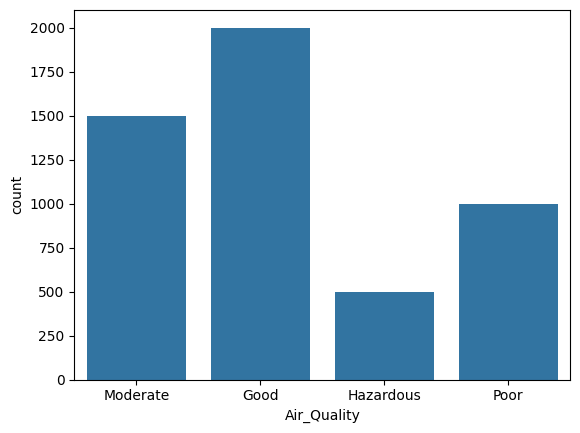

In [37]:
sns.countplot(data=df, x='Air_Quality')
plt.show()


In [38]:
le = LabelEncoder()
df['Air_Quality_Label'] = le.fit_transform(df['Air_Quality'])


In [39]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air_Quality,Air_Quality_Label
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous,1
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate,2
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate,2
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good,0


In [40]:
numeric_cols = ['Temperature', 'Humidity', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


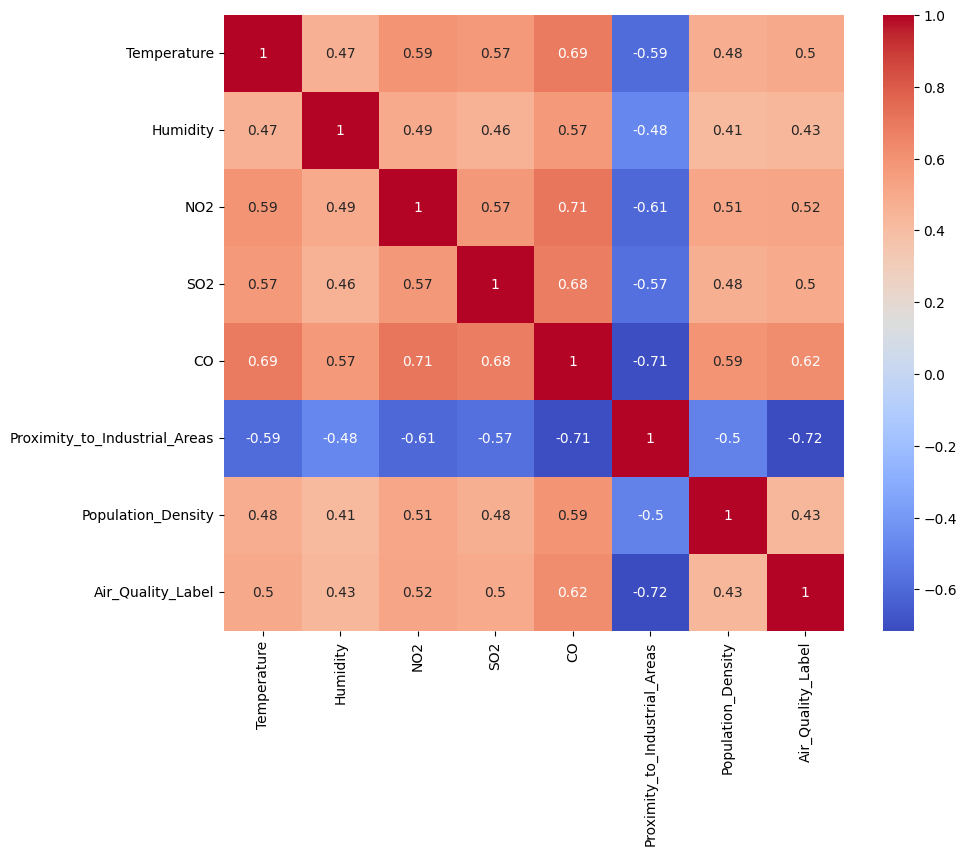

In [41]:
corr_matrix = df[numeric_cols + ['Air_Quality_Label']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [42]:
X = df[numeric_cols]
y = df['Air_Quality_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


n_estimators=0 skipped (invalid)
n_estimators=5: Accuracy = 0.9400
n_estimators=10: Accuracy = 0.9440
n_estimators=50: Accuracy = 0.9527
n_estimators=100: Accuracy = 0.9533
n_estimators=150: Accuracy = 0.9507
n_estimators=250: Accuracy = 0.9507
n_estimators=500: Accuracy = 0.9507
n_estimators=1000: Accuracy = 0.9493

 BEST n_estimators = 100
 BEST Accuracy     = 0.9533



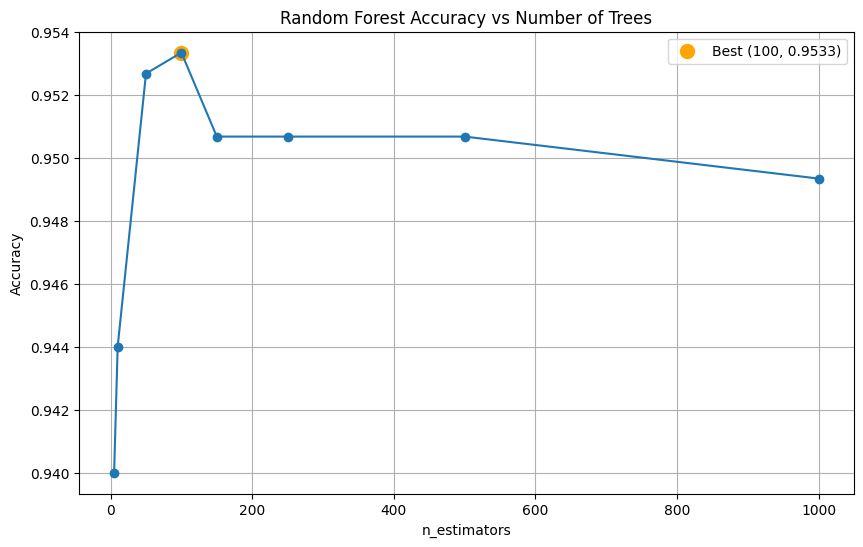

In [43]:
# List of n_estimators to test
estimators = [0, 5, 10, 50, 100, 150, 250, 500, 1000]

accuracies = []

for n in estimators:
    if n == 0:
        accuracies.append(None)
        print("n_estimators=0 skipped (invalid)")
        continue

    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"n_estimators={n}: Accuracy = {acc:.4f}")

# -----------------------------
# Find best value
# -----------------------------
# Filter out None values
valid_results = [(n, acc) for n, acc in zip(estimators, accuracies) if acc is not None]

# Pick the result with highest accuracy
best_n, best_acc = max(valid_results, key=lambda x: x[1])

print("\n==============================")
print(f" BEST n_estimators = {best_n}")
print(f" BEST Accuracy     = {best_acc:.4f}")
print("==============================\n")

# Plot accuracy vs n_estimators
plt.figure(figsize=(10, 6))
plt.plot(estimators, accuracies, marker='o')
plt.title("Random Forest Accuracy vs Number of Trees")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid(True)

# Highlight the best point in orange
plt.scatter(best_n, best_acc, color='orange', s=100, label=f"Best ({best_n}, {best_acc:.4f})")
plt.legend()

plt.show()

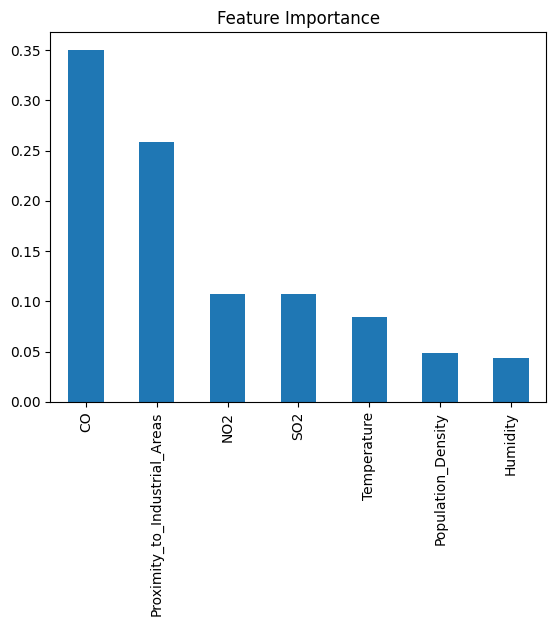

In [44]:
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=numeric_cols)
feat_importance.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance")
plt.show()


<Figure size 2000x1000 with 0 Axes>

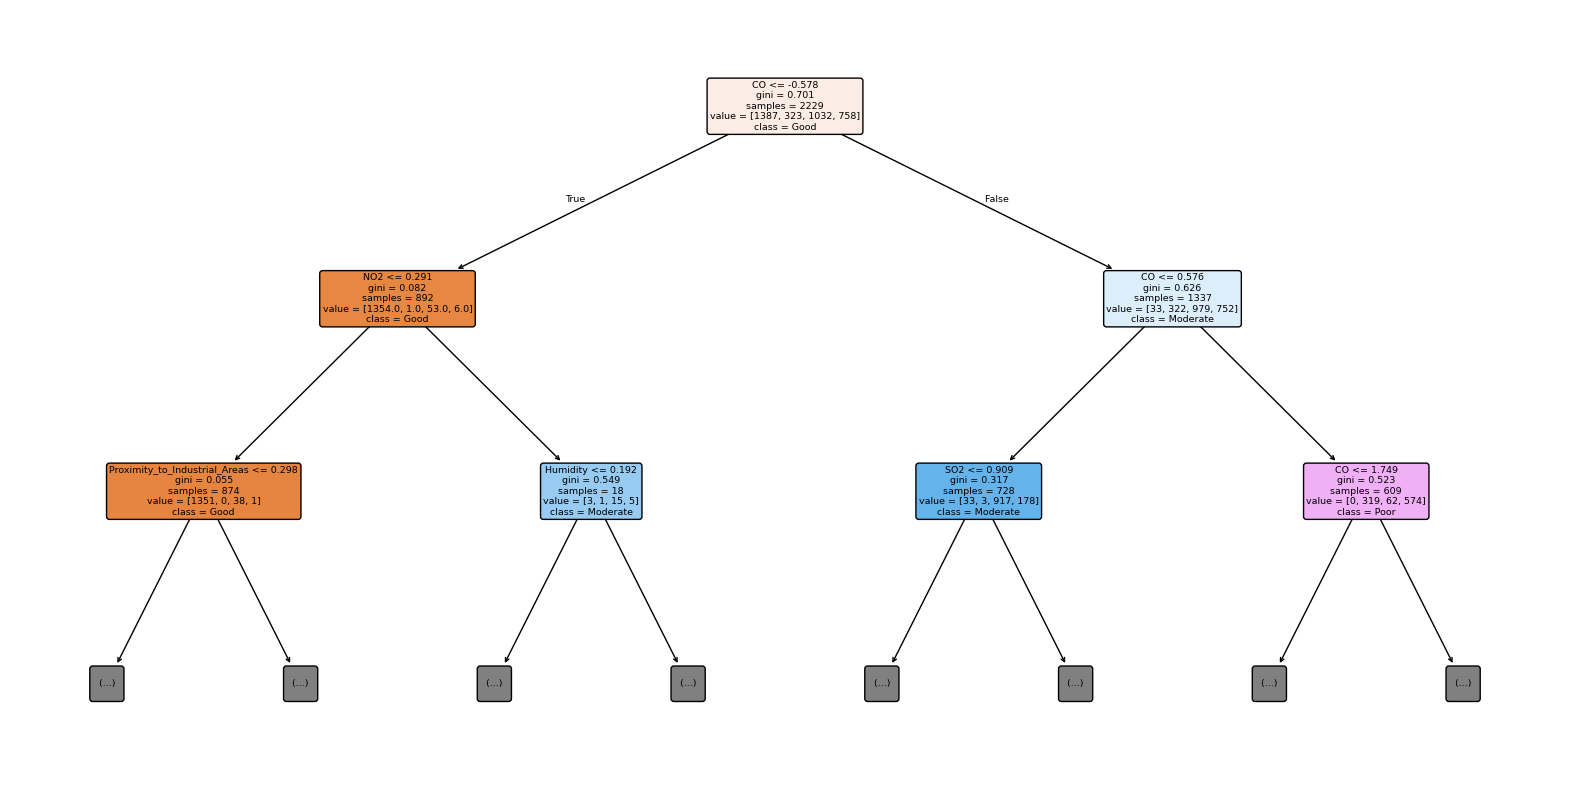

In [45]:
from sklearn import tree

tree_0 = model.estimators_[0]

# Print human-readable text version - Showing only two levels for eye visualization
tree_rules = export_text(tree_0, feature_names=list(X_train.columns))
plt.figure(figsize=(20, 10))
plt.figure(figsize=(20, 10))
tree.plot_tree(
    model.estimators_[0],
    feature_names=X_train.columns,
    class_names=[str(c) for c in le.classes_],
    filled=True,
    rounded=True,
    max_depth=2
)

plt.savefig("random_forest_tree.png", dpi=300, bbox_inches='tight')  # 300 DPI for high quality

plt.show()



Correlation with target:
 Air_Quality_Label                1.000000
Proximity_to_Industrial_Areas    0.715686
CO                               0.618933
NO2                              0.521952
Temperature                      0.501446
SO2                              0.497263
Population_Density               0.432361
Humidity                         0.430633
Name: Air_Quality_Label, dtype: float64

Selected Features: ['Proximity_to_Industrial_Areas', 'CO', 'NO2', 'Temperature', 'SO2', 'Population_Density', 'Humidity']
DecisionTree max_depth=1: Acc=0.6750
DecisionTree max_depth=2: Acc=0.8150
DecisionTree max_depth=3: Acc=0.8830
DecisionTree max_depth=5: Acc=0.9000
DecisionTree max_depth=7: Acc=0.9140
DecisionTree max_depth=10: Acc=0.9290
DecisionTree max_depth=15: Acc=0.9280
DecisionTree max_depth=20: Acc=0.9280
RF n_estimators=0 skipped
RandomForest n_estimators=5: Acc=0.9370
RandomForest n_estimators=10: Acc=0.9440
RandomForest n_estimators=50: Acc=0.9520
RandomForest n_estimators=10

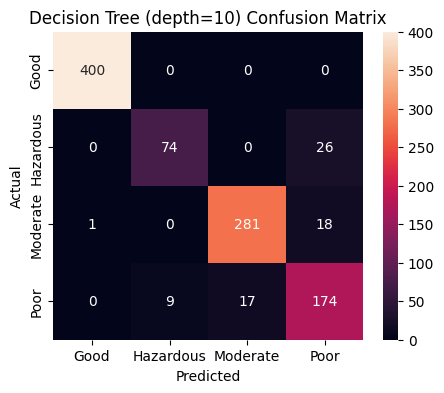


=== Random Forest (n=100) ===
Accuracy: 0.9530
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       400
   Hazardous       0.90      0.83      0.86       100
    Moderate       0.96      0.97      0.97       300
        Poor       0.88      0.90      0.89       200

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.93      1000
weighted avg       0.95      0.95      0.95      1000



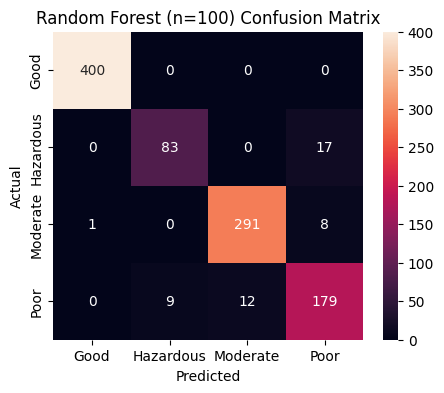


=== SVM (C=20) ===
Accuracy: 0.9480
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       400
   Hazardous       0.87      0.84      0.85       100
    Moderate       0.96      0.97      0.96       300
        Poor       0.88      0.87      0.87       200

    accuracy                           0.95      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



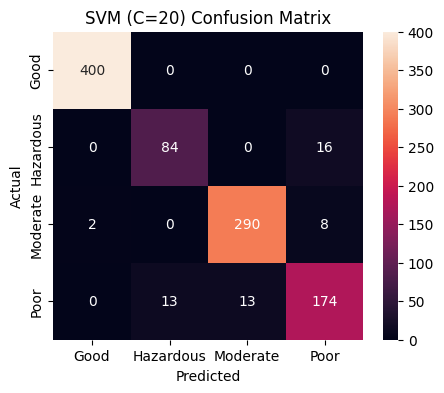


=== KNN (k=9) ===
Accuracy: 0.9310
              precision    recall  f1-score   support

        Good       0.98      1.00      0.99       400
   Hazardous       0.95      0.72      0.82       100
    Moderate       0.92      0.96      0.94       300
        Poor       0.84      0.86      0.85       200

    accuracy                           0.93      1000
   macro avg       0.92      0.88      0.90      1000
weighted avg       0.93      0.93      0.93      1000



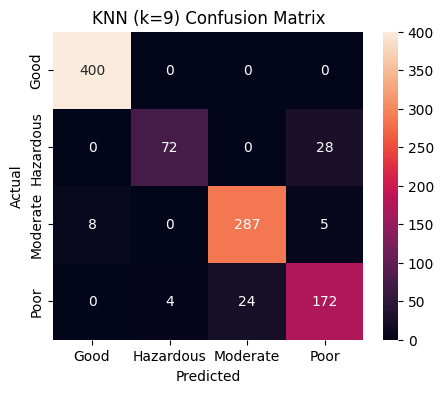


=== NeuralNet (50,) ===
Accuracy: 0.9480
              precision    recall  f1-score   support

        Good       0.99      1.00      1.00       400
   Hazardous       0.89      0.81      0.85       100
    Moderate       0.96      0.97      0.96       300
        Poor       0.87      0.89      0.88       200

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



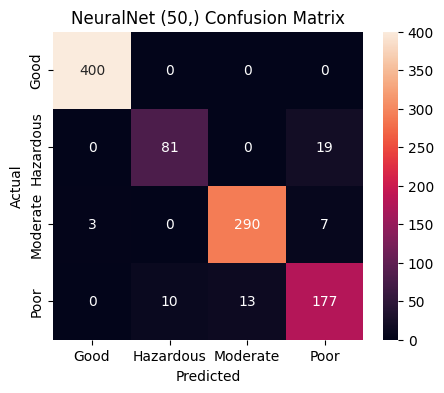


Model Comparison:
                      Model  Accuracy
0  Decision Tree (depth=10)     0.929
1     Random Forest (n=100)     0.953
2                SVM (C=20)     0.948
3                 KNN (k=9)     0.931
4           NeuralNet (50,)     0.948


In [46]:
# -----------------------------
# Step 2: Feature selection based on correlation
# -----------------------------
corr_with_target = df[numeric_cols + ['Air_Quality_Label']].corr()['Air_Quality_Label'].abs().sort_values(ascending=False)
print("Correlation with target:\n", corr_with_target)

selected_features = corr_with_target[corr_with_target > 0.3].index.drop('Air_Quality_Label').tolist()
print("\nSelected Features:", selected_features)

X = df[selected_features]
y = df['Air_Quality_Label']

# -----------------------------
# Step 3: Standardize features
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ============================================================
# HYPERPARAMETER SEARCH FOR ALL MODELS
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

results = []

# -----------------------------------------------
# Decision Tree (test different depths)
# -----------------------------------------------
dt_depths = [1, 2, 3, 5, 7, 10, 15, 20]
dt_accuracies = []

for d in dt_depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    dt_accuracies.append(acc)
    print(f"DecisionTree max_depth={d}: Acc={acc:.4f}")

best_dt_depth, best_dt_acc = max(zip(dt_depths, dt_accuracies), key=lambda x: x[1])
best_dt_model = DecisionTreeClassifier(max_depth=best_dt_depth, random_state=42).fit(X_train, y_train)


# -----------------------------------------------
# Random Forest
# -----------------------------------------------
rf_estimators = [0, 5, 10, 50, 100, 150, 250, 500, 1000]
rf_accuracies = []

for n in rf_estimators:
    if n == 0:
        rf_accuracies.append(None)
        print("RF n_estimators=0 skipped")
        continue
    
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    rf_accuracies.append(acc)
    print(f"RandomForest n_estimators={n}: Acc={acc:.4f}")

valid_rf = [(n, a) for n, a in zip(rf_estimators, rf_accuracies) if a is not None]
best_rf_n, best_rf_acc = max(valid_rf, key=lambda x: x[1])
best_rf_model = RandomForestClassifier(n_estimators=best_rf_n, random_state=42).fit(X_train, y_train)


# -----------------------------------------------
# SVM (test different C values)
# -----------------------------------------------
svm_C_values = [0.1, 0.5, 1, 5, 10, 20]
svm_accuracies = []

for c in svm_C_values:
    model = SVC(kernel="rbf", C=c, probability=True, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    svm_accuracies.append(acc)
    print(f"SVM C={c}: Acc={acc:.4f}")

best_svm_C, best_svm_acc = max(zip(svm_C_values, svm_accuracies), key=lambda x: x[1])
best_svm_model = SVC(kernel="rbf", C=best_svm_C, probability=True, random_state=42).fit(X_train, y_train)


# -----------------------------------------------
# KNN (test K)
# -----------------------------------------------
knn_neighbors = [1, 3, 5, 7, 9, 11, 15]
knn_accuracies = []

for k in knn_neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    knn_accuracies.append(acc)
    print(f"KNN k={k}: Acc={acc:.4f}")

best_knn_k, best_knn_acc = max(zip(knn_neighbors, knn_accuracies), key=lambda x: x[1])
best_knn_model = KNeighborsClassifier(n_neighbors=best_knn_k).fit(X_train, y_train)


# -----------------------------------------------
# Neural Network (test different layer sizes)
# -----------------------------------------------
nn_sizes = [(50,), (100,), (100,100), (150,150)]
nn_accuracies = []

for size in nn_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    nn_accuracies.append(acc)
    print(f"NeuralNet layers={size}: Acc={acc:.4f}")

best_nn_size, best_nn_acc = max(zip(nn_sizes, nn_accuracies), key=lambda x: x[1])
best_nn_model = MLPClassifier(hidden_layer_sizes=best_nn_size, max_iter=1000, random_state=42).fit(X_train, y_train)


# ============================================================
# Evaluate ALL final chosen models (with confusion matrix)
# ============================================================

final_models = {
    f"Decision Tree (depth={best_dt_depth})": best_dt_model,
    f"Random Forest (n={best_rf_n})": best_rf_model,
    f"SVM (C={best_svm_C})": best_svm_model,
    f"KNN (k={best_knn_k})": best_knn_model,
    f"NeuralNet {best_nn_size}": best_nn_model
}

for name, model in final_models.items():
    print(f"\n=== {name} ===")
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    results.append({"Model": name, "Accuracy": acc})


# Summary Table
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)


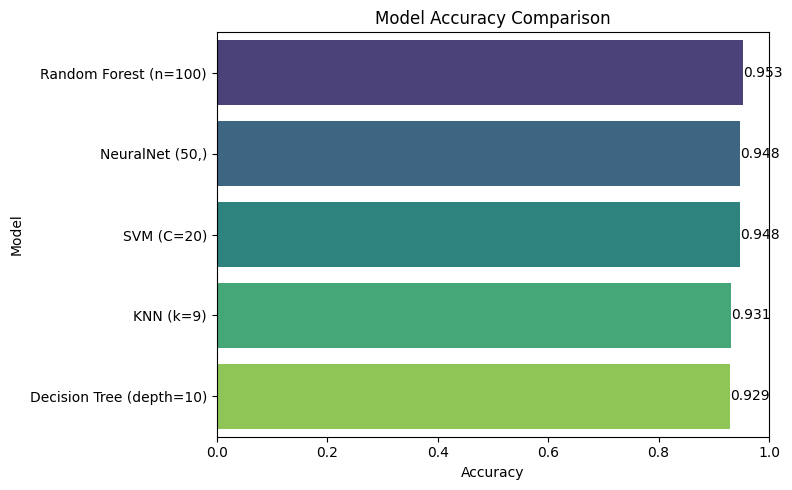

In [47]:
# Sort models by accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')

# Add labels and title
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)  # Accuracy ranges from 0 to 1

# Annotate bars with accuracy values
for i, (accuracy, model) in enumerate(zip(results_df['Accuracy'], results_df['Model'])):
    plt.text(accuracy, i, f"{accuracy:.3f}", va='center')

plt.tight_layout()
plt.show()


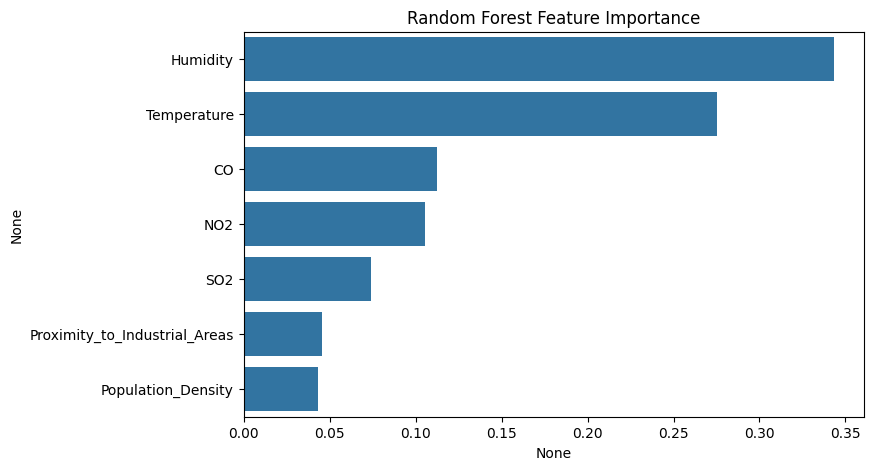

In [48]:
rf = models["Random Forest"]
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=numeric_cols).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Random Forest Feature Importance")
plt.show()


In [49]:
daily_updates = pd.read_csv('latam_air_quality_real.csv')  # adjust filename

FileNotFoundError: [Errno 2] No such file or directory: 'latam_air_quality_real.csv'

In [ ]:
print(daily_updates.isnull().sum())


In [ ]:
df

In [ ]:
daily_updates = daily_updates.dropna()


In [ ]:
print(daily_updates.isnull().sum())


In [ ]:
daily_updates.reset_index(drop=True, inplace=True)

In [ ]:
daily_updates

In [ ]:
# Keep only the selected features
X_new = daily_updates[selected_features]

# Apply the same scaler used during training
X_new_scaled = scaler.transform(X_new)

# Encode target if available (for evaluation)
y_new = None
if 'Air_Quality_Label' in daily_updates.columns:
    y_new = le.transform(daily_updates['Air_Quality_Label'])


In [ ]:
y_pred_new = models['SVM'].predict(X_new_scaled)


In [ ]:
y_pred_labels = le.inverse_transform(y_pred_new)
print(y_pred_labels)


In [ ]:
# -----------------------------
# Step 1: Prepare features
# -----------------------------
# Ensure all selected features exist
missing_cols = [c for c in selected_features if c not in daily_updates.columns]
if missing_cols:
    raise ValueError(f"Missing columns in new data: {missing_cols}")

X_new = daily_updates[selected_features].copy()

# Handle missing values (if any)
X_new.fillna(X_new.mean(), inplace=True)

# Apply the same scaler used during training
X_new_scaled = scaler.transform(X_new)

# -----------------------------
# Step 2: Prepare target (if exists)
# -----------------------------
y_new = None
if 'Air_Quality_Label' in daily_updates.columns:
    # Ensure all labels exist in the original LabelEncoder
    new_labels = daily_updates['Air_Quality_Label'].unique()
    unseen_labels = set(new_labels) - set(le.classes_)
    if unseen_labels:
        raise ValueError(f"New data contains unseen labels: {unseen_labels}")
    
    y_new = le.transform(daily_updates['Air_Quality_Label'])

# -----------------------------
# Step 3: Predict
# -----------------------------
y_pred_new = models['Random Forest'].predict(X_new_scaled)
y_pred_labels = le.inverse_transform(y_pred_new)
print("Predicted labels for new data:")
print(y_pred_labels)

# -----------------------------
# Step 4: Evaluate (if target exists)
# -----------------------------
if y_new is not None:
    acc = accuracy_score(y_new, y_pred_new)
    print(f"\nAccuracy on new data: {acc:.4f}\n")
    
    print("Classification Report:")
    print(classification_report(y_new, y_pred_new, target_names=le.classes_))
    
    cm = confusion_matrix(y_new, y_pred_new)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title('Confusion Matrix - New Data')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
y_new

In [ ]:
### Analysis results (summary)
- Random Forest (n=100) achieved highest accuracy: **95.3%** on test data.
- Other models (NeuralNet, SVM, KNN, Decision Tree) also performed well (92.9–94.8%).
- Most influential features: Proximity_to_Industrial_Areas, CO, NO2 (highest correlation); Humidity and Temperature (highest feature importance).
- Confusion matrix shows strong class-wise prediction, with minor confusion between adjacent air-quality levels.

### Contribution of results
- Enables reliable, automated air-quality classification for proactive pollution response.
- Identifies key drivers of air-quality, guiding targeted interventions.
- Provides a validated, deployable baseline model for real-world air-quality monitoring.
